<a href="https://colab.research.google.com/github/Ar-Anik/Machine_Learning/blob/main/Gradient_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Video Link](https://www.youtube.com/playlist?list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6)

[Gradient Boost in Bangla](https://datasinsightsbd.gitbook.io/dsbook/supervised-ml/gradient-boost)

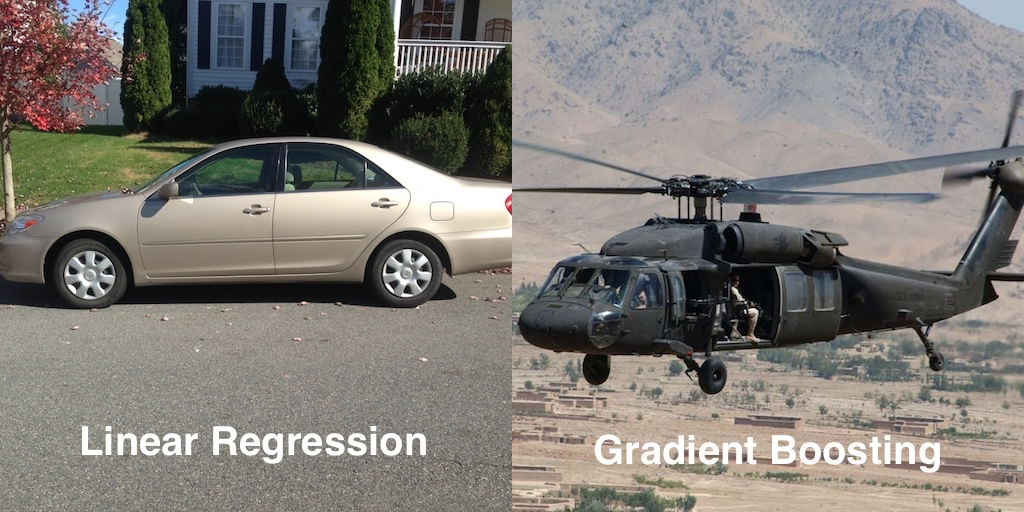

In [29]:
# laod dataset

from sklearn.datasets import load_boston

boston = load_boston()

In [30]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [31]:
# Each row

boston.data[0:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [32]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

CRIM: Per capita crime rate by town <br><br>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft <br><br>
INDUS: Proportion of non-retail business acres per town <br><br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br><br>
NOX: Nitric oxide concentration (parts per 10 million) <br><br>
RM: Average number of rooms per dwelling<br><br>
AGE: Proportion of owner-occupied units built prior to 1940 <br><br>
DIS: Weighted distances to five Boston employment centers <br><br>
RAD: Index of accessibility to radial highways <br><br>

TAX: Full-value property tax rate per $10,000 <br><br>

PTRATIO: Pupil-teacher ratio by town <br><br>
B:  proportion of people of African American descent by town <br><br>
LSTAT: Percentage of lower status of the population <br><br>
MEDV: Median value of owner-occupied homes in $1000s (its call target)

In [33]:
import pandas

pandas.Series(boston.target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [34]:
x = pandas.DataFrame(boston.data, columns=boston.feature_names)

x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [35]:
y = pandas.Series(boston.target)

y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [36]:
# split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
len(x_train)

404

In [38]:
len(x_test)

102

In [39]:
len(y_train)

404

In [40]:
len(y_test)

102

In [41]:
# Gradient Boosting Model Creation
# max_depth = each weak learner level number
# n_estimators = number of weak learner
# learning_rate = It contributes to the weights of weak learners

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=0.5)

In [42]:
# Train GradientBoostingRegressor model

model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
# accuracy 

model.score(x_test, y_test)

0.7969896551574619

In [44]:
# feature importance

model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01890632,
       0.55499803, 0.        , 0.05278085, 0.        , 0.        ,
       0.0517481 , 0.        , 0.3215667 ])

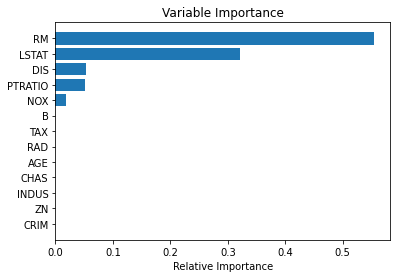

In [45]:
# plot feature importance
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

fim = model.feature_importances_

s_indx = numpy.argsort(fim)

x_axis = numpy.arange(sorted_idx.shape[0])

plt.barh(x_axis, fim[s_indx], align='center')

plt.xlabel('Relative Importance')
plt.yticks(x_axis, boston.feature_names[s_indx])
plt.title('Variable Importance')

plt.show()
